In [2]:
library(tidyr)
library(dplyr)
library(lubridate)
library(xts)
source("Lib/")
#Predict for Hvaler
HvalerTrainingFile = "Hvaler/training_set.csv"
HvalerCompleteFile = "Hvaler/imputed_complete.csv"
OutputDir = "Hvaler/Predictions/"
HvalerClasses = c('POSIXct', rep("numeric", 21))
Zones = paste0("subs.", seq(1, 20))
Temperatures = c("T01")
Horizons = seq(1, 24)
trainingDf = read.csv(HvalerTrainingFile, stringsAsFactors=FALSE, colClasses=HvalerClasses)
completeDf = read.csv(HvalerCompleteFile, stringsAsFactors=FALSE, colClasses=HvalerClasses)


In [12]:
library("forecast")
library("xts")
#Extract testing period
idxNaCases = !complete.cases(trainingDf)
startPoints =  which(idxNaCases & !c(FALSE, head(idxNaCases, -1)) & c(tail(idxNaCases, -1), TRUE))
endPoints = which(idxNaCases & c(TRUE, head(idxNaCases, -1)) & !c(tail(idxNaCases, -1), FALSE))
startDates = trainingDf$DateTime[startPoints]
endDates = trainingDf$DateTime[endPoints]
nTestingPeriods = length(startDates)

#Use TBATS
zones = "subs.1"
horizons = c(1)

xtsDf = xts(x = completeDf[, -1], order.by = completeDf[, 1])
maxHorizons = max(horizons)
#Build models and make predictions
predictions = rep(list(trainingDf), max(horizons));
season1 = 24; #Hourly seasonal
season2 = 24*7; #Weekly seasonal
for (zone in zones){
    xts = xtsDf[, zone]
    for (period in seq(1, nTestingPeriods)){
        startPoint = startPoints[period]
        endPoint = endPoints[period]
        startTrainingPoint = startPoint - 12*season2 #Only get 3 months of data for training
        trainXts = xts[startTrainingPoint:(startPoint-1)]
        model = tbats(drop(coredata(trainXts)), seasonal.periods = 24, use.box.cox = TRUE, num.cores = 8)
        testXts = trainXts
        for (currentPoint in seq(startPoint, endPoint)){
            refit = tbats(drop(coredata(testXts)), model=model)
            prediction = forecast(refit, h=maxHorizons)$mean
            for (h in horizons){
                if (currentPoint+h-1 <= endPoint){
                   predictions[[h]][currentPoint+h-1, zone] = prediction[h]
                }
            }            
            testXts = c(testXts, xts[currentPoint])
        }
    }
}


 Module   :  strip 
 Author   :  Tim Appelhans <tim.appelhans@gmail.com>, Thomas Nauss 
 Version  :  2012-01-06 
 License  :  GNU GPLv3, see http://www.gnu.org/licenses/ 


Loading required package: latticeExtra
Loading required package: lattice
Loading required package: RColorBrewer
Loading required package: grid
Loading required package: reshape

Attaching package: ‘reshape’

The following object is masked from ‘package:lubridate’:

    stamp

The following object is masked from ‘package:dplyr’:

    rename

The following objects are masked from ‘package:tidyr’:

    expand, smiths

Loading required package: plyr
------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:reshape’:

    rename, round_any

The following object is masked from ‘package:lubridate’:

    here

The following objects are masked

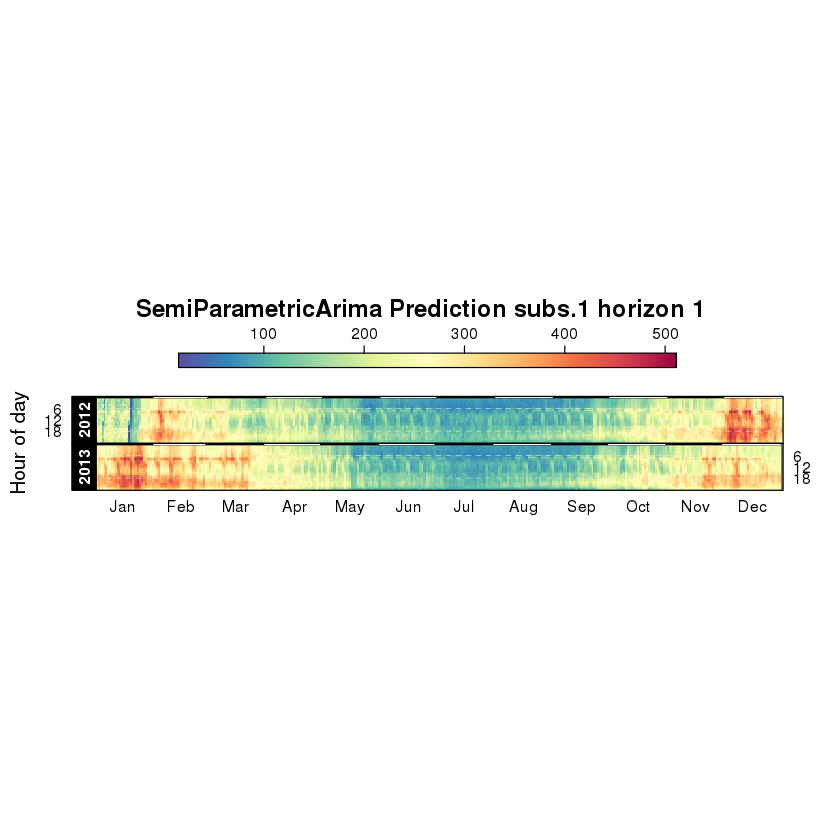

In [14]:
source("Lib/strip.R")
zoneDf = predictions[[1]]
for (zone in zones){
    strip(x = zoneDf[[zone]], 
    date = zoneDf$DateTime,
    cond = year(zoneDf$DateTime),
    arrange = "wide",
    main = paste("SemiParametricArima Prediction", zone, "horizon", h))
}

In [10]:
as.ts(testXts)

Time Series:
Start = 1 
End = 7858801 
Frequency = 0.000277777777777778 
   [1] 355.8000 354.5500 361.1000 370.2700 383.5200 398.0900 444.3100 485.1500
   [9] 436.4300 427.1600 400.0500 360.0000 348.4200 355.1900 350.7600 364.3400
  [17] 420.8400 456.7700 455.1300 454.4500 453.4700 463.7900 429.6800 403.1800
  [25] 381.4600 384.2800 379.5600 389.3300 402.8600 422.2700 477.6300 511.3500
  [33] 459.6800 448.7000 431.1100 398.1200 385.6300 378.8500 364.8700 392.8200
  [41] 428.5700 479.2000 469.2600 484.7800 471.3300 467.6100 448.0700 390.1500
  [49] 389.1200 386.5700 399.1900 395.5700 402.5300 403.4000 448.8100 482.2500
  [57] 423.5300 431.0700 394.0100 388.8500 349.8500 338.6100 337.3300 355.9700
  [65] 395.0400 405.0800 419.2400 416.2200 429.5200 431.8500 406.2400 388.9200
  [73] 364.3300 370.5300 364.8300 375.9600 386.2200 408.0600 444.9700 480.9100
  [81] 425.0900 393.3400 392.2300 390.1800 357.2000 347.4700 352.1100 353.3100
  [89] 384.9800 416.8700 441.8300 436.1700 405.6600 373.49